In [2]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from alive_progress import alive_bar
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
import os
import shutil
impo

In [4]:
# RUN ONCE

if (not os.path.exists("Fall")):
    os.mkdir("Fall")
if (not os.path.exists("Not Fall")):
    os.mkdir("Not Fall")
with alive_bar(force_tty=True) as bar:
    for folder in os.listdir('sensor_data'):
        folder_path  = f'sensor_data/{folder}'
        for file in os.listdir(folder_path):
            file_path   = f'{folder_path}/{file}'
            with open(file_path, "rbU") as f:
                num_lines = sum(1 for _ in f)
            if(19<int(file[4:6])<35):
                if(num_lines<=1000):
                    shutil.copy(file_path,'Fall')
            else:
                if(num_lines<=1000):
                    shutil.copy(file_path,'Not Fall')
            bar()

            

|████████████████████████████████████████| 5075 in 1:21.5 (62.38/s)             


In [4]:
features = ['AccX','AccY','AccZ','GyrX','GyrY','GyrZ']

In [5]:
X,Y = [],[]

In [6]:
df = None
X,Y = [],[]
with alive_bar(force_tty=True) as bar: 
    for file in (os.listdir('Fall')):
        file_path = f'Fall/{file}'
        df = pd.read_csv(file_path,usecols=features)
        df = df.reindex(range(1000), fill_value=0)
        X.append(tf.convert_to_tensor(df))
        Y.append(1)
        bar()

# print(df.head())
# print(df.tail())

|████████████████████████████████████████| 2306 in 19.8s (116.70/s)             


In [7]:
df = None
with alive_bar(force_tty=True) as bar:
    for file in os.listdir('Not Fall'):
        file_path = f'Not Fall/{file}'
        df = pd.read_csv(file_path,usecols=features)
        df = df.reindex(range(1000), fill_value=0)
        X.append(tf.convert_to_tensor(df))
        Y.append(0)
        bar()

# print(df.head())
# print(df.tail())

|████████████████████████████████████████| 2253 in 15.4s (146.04/s)             


In [8]:
# X_tensor = np.array(X)
# bsize = X_tensor.shape[0]
# tstamps = X_tensor.shape[1]
# feats = X_tensor.shape[2]
X_tensor = np.asarray(X)

In [11]:
scaler = StandardScaler()
scaler.fit(X_tensor.reshape((bsize*tstamps,feats)))

StandardScaler()

In [12]:
X_tensor = (scaler.transform(X_tensor.reshape((bsize*tstamps,feats)))).reshape((bsize,tstamps,feats))

In [9]:
Y_tensor = np.asarray(Y)


In [10]:
INPUT_DIM = 6
OUTPUT_DIM = 1
SEQUENCE_LEN = 1000
loss="binary_crossentropy"
optimizer="adam"
metrics=['accuracy']

In [11]:
y_tensor=Y_tensor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.20, random_state=42,stratify=y_tensor)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42,stratify=y_test)


In [12]:
model7 = keras.Sequential()
model7.add(layers.LSTM(128,input_dim=INPUT_DIM,input_length=SEQUENCE_LEN))
model7.add(layers.Dense(64,activation="relu"))
model7.add(layers.Dense(32,activation="relu"))
model7.add(layers.Dense(16,activation="relu"))
model7.add(layers.Dense(OUTPUT_DIM,activation="sigmoid"))
model7.compile(loss=loss,optimizer=optimizer,metrics=metrics)


In [13]:
history7 = model7.fit(X_train,y_train,batch_size=16,epochs=10,validation_data=(X_val,y_val),verbose=True)


Epoch 1/10
228/228 [==============================] - 38s 120ms/step - loss: 0.6880 - accuracy: 0.5070 - val_loss: 0.6781 - val_accuracy: 0.5482
Epoch 2/10
228/228 [==============================] - 16s 72ms/step - loss: 0.6593 - accuracy: 0.5594 - val_loss: 0.6857 - val_accuracy: 0.5154
Epoch 3/10
228/228 [==============================] - 16s 72ms/step - loss: 0.6695 - accuracy: 0.5300 - val_loss: 0.6782 - val_accuracy: 0.5329
Epoch 4/10
228/228 [==============================] - 16s 72ms/step - loss: 0.6672 - accuracy: 0.5404 - val_loss: 0.6729 - val_accuracy: 0.5373
Epoch 5/10
228/228 [==============================] - 16s 72ms/step - loss: 0.6925 - accuracy: 0.5136 - val_loss: 0.6927 - val_accuracy: 0.4934
Epoch 6/10
228/228 [==============================] - 16s 71ms/step - loss: 0.6928 - accuracy: 0.5032 - val_loss: 0.6919 - val_accuracy: 0.5132
Epoch 7/10
228/228 [==============================] - 17s 73ms/step - loss: 0.6912 - accuracy: 0.5229 - val_loss: 0.6954 - val_accuracy

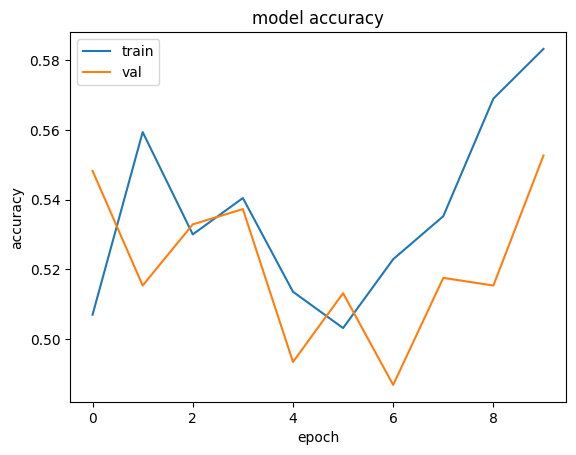

In [14]:
np.save("model7.npy",history7.history)
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
evaluation7 = model7.evaluate(X_test,y_test,verbose=True,return_dict=True)
evaluation7

15/15 [==============================] - 1s 64ms/step - loss: 0.6853 - accuracy: 0.5614


{'loss': 0.6853474974632263, 'accuracy': 0.5614035129547119}

In [ ]:
model7.save("model_7_1.h5")


In [ ]:
model8 = keras.Sequential()
model8.add(layers.LSTM(128,input_dim=INPUT_DIM,input_length=SEQUENCE_LEN))
model8.add(layers.Dense(64,activation="relu"))
model8.add(layers.Dense(32,activation="relu"))
model8.add(layers.Dense(16,activation="relu"))
model8.add(layers.Dense(OUTPUT_DIM,activation="sigmoid"))
model8.compile(loss=loss,optimizer=optimizer,metrics=metrics)


In [108]:
history8 = model8.fit(X_train,y_train,batch_size=16,epochs=10,validation_data=(X_val,y_val),verbose=True)



ValueError: Exception encountered when calling layer "conv2d_7" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_7/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_7/Conv2D/ReadVariableOp)' with input shapes: [?,499,2,256], [3,3,256,64].

Call arguments received by layer "conv2d_7" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 499, 2, 256), dtype=float32)

In [1]:
model8.save("model_8_1.h5")

NameError: name 'model2' is not defined

In [5]:
# evaluation2 = model2.evaluate(X_test,y_test,verbose=True,return_dict=True)
# evaluation2



NameError: name 'model2' is not defined

In [3]:
model3 = tf.keras.models.load_model("model3")

In [4]:
import math
import numpy as np

def Euler(roll,pitch,yaw):
    return pitch,roll,yaw


    return rx*57.2958*10, ry*57.2958*10, rz*57.2958*10
# 


In [23]:
from scipy.ndimage.filters import uniform_filter1d
from scipy import stats

C:\Users\prach\AppData\Local\Temp\ipykernel_22896\3541330012.py:1: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


In [32]:
result = pd.read_csv('result.csv')
result = result[:5000]
# result['EulerX'] = 0
# result['EulerY'] = 0
# result['EulerZ'] = 0
print(len(result))

# for i in range(len(result)):
#     result.loc[i,['EulerX','EulerY','EulerZ']] = (Euler(*result.loc[i,['Roll','Pitch','Yaw']]))
result = result.drop(columns=['Timestamp','Roll','Yaw','Pitch'])
for col in range(6):
    result.iloc[:,col] = uniform_filter1d(result.iloc[:,col],size=10)

result['Acc_X'],result['Acc_Z'] = result['Acc_Z'],result['Acc_X']
result['Gyro_X'],result['Gyro_Z'] = result['Gyro_Z'],result['Gyro_X'] 
# result['EulerX'],result['EulerZ'] = result['EulerZ'],result['EulerX'] 
result['Acc_X'] = result['Acc_X']/-9.8
result['Acc_Y'] = result['Acc_Y']/-9.8
result['Acc_Z'] = result['Acc_Z']/-9.8


# result['Acc_X']= result['Acc_X']*0.5 + 0.25
# result['Acc_Y']= result['Acc_Y'] * 0.4 - 0.7
# result['Acc_Z']= result['Acc_Z'] - 0.5

# result['Gyro_X']= result['Gyro_X']*10
# result['Gyro_Y']= result['Gyro_Y']*10
# result['Gyro_Z']= result['Gyro_Z']*10


# result['EulerX']= result['EulerX']*0.1+20 
# result['EulerY']= result['EulerY']
# result['EulerZ']= result['EulerZ']


test = result
# for col in range(9):
#     test.iloc[:,col] = uniform_filter1d(test.iloc[:,col],size=10)

test.head()



5000


,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z
0,-0.855361,-0.495021,-0.081222,-0.043767,-0.016676,-0.020127
1,-0.855922,-0.494924,-0.081209,-0.043706,-0.016004,-0.020250
2,-0.857436,-0.494570,-0.081234,-0.043233,-0.014889,-0.020815
3,-0.859469,-0.493996,-0.081472,-0.042332,-0.013637,-0.021807
4,-0.861966,-0.493330,-0.081564,-0.041186,-0.013118,-0.023121


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
truth = pd.read_csv('Not Fall/S06T02R01.csv')
truth.drop(columns=['TimeStamp(s)','FrameCounter'],inplace=True)
truth.reindex(range(1000), fill_value=0)

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
0,-0.059,-1.007,-0.050,-3.609635,-7.161975,0.859437,87.926135,-3.093973,-53.124666
1,-0.051,-1.002,-0.060,-5.385805,-4.640960,0.859437,87.874568,-3.099703,-53.170502
2,-0.058,-0.999,-0.066,-5.500397,-4.812847,0.916733,87.823002,-3.111162,-53.222069
3,-0.062,-0.999,-0.070,-5.500397,-4.354481,0.974029,87.771436,-3.122621,-53.262176
4,-0.061,-0.999,-0.076,-5.443101,-3.838819,1.145916,87.685492,-3.139810,-53.290824
...,...,...,...,...,...,...,...,...,...
995,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
predictions = []
for i in range(250,len(test)-500):
    x = test[i:i+500].reset_index(drop=True)
    x = x.reindex(range(1000))
    test_tensor = tf.convert_to_tensor(x)
    print(x.shape)
    predictions.append(model2.predict(np.asarray([test_tensor])))
    temp = truth[i:i+500].reset_index(drop=True)
    temp = temp.reset_index()
    for col in range(6):
        print(x.columns[col])
        plt.figure()
        plt.plot(x.iloc[:,col],color='orange')
        plt.plot(temp.iloc[:,col],color='green')
    break
    

(1000, 9)


NameError: name 'model2' is not defined

In [24]:
import time

In [34]:
predictions = []
print(test.head())
prediction_time = []
for i in range(250,len(test)-1000):
    x = test[i:i+1000].reset_index(drop=True)
    test_tensor = tf.convert_to_tensor(x)
    predictions.append(model3.predict(np.asarray([test_tensor])).item())

      Acc_X     Acc_Y     Acc_Z    Gyro_X    Gyro_Y    Gyro_Z
0 -0.855361 -0.495021 -0.081222 -0.043767 -0.016676 -0.020127
1 -0.855922 -0.494924 -0.081209 -0.043706 -0.016004 -0.020250
2 -0.857436 -0.494570 -0.081234 -0.043233 -0.014889 -0.020815
3 -0.859469 -0.493996 -0.081472 -0.042332 -0.013637 -0.021807
4 -0.861966 -0.493330 -0.081564 -0.041186 -0.013118 -0.023121
1/1 [==============================] - 0s 47ms/step


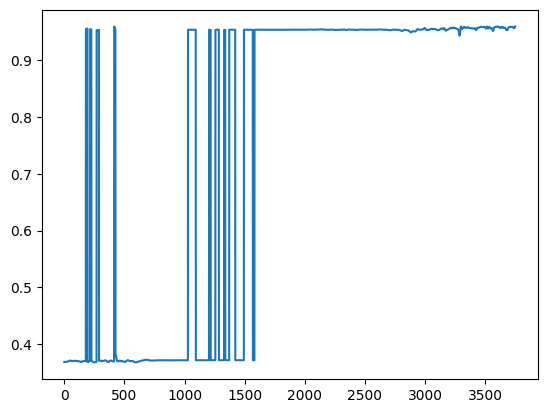

In [35]:
plt.plot(predictions)
# pd.Series({'time':prediction_time}).head()


In [40]:
result2 = pd.read_csv('phoneThrow.csv')
result2 = result2[:5000]
# result2['EulerX'] = 0
# result2['EulerY'] = 0
# result2['EulerZ'] = 0
print(len(result2))

# for i in range(len(result2)):
#     result2.loc[i,['EulerX','EulerY','EulerZ']] = (Euler(*result2.loc[i,['Roll','Pitch','Yaw']]))
result2 = result2.drop(columns=['Timestamp','Roll','Yaw','Pitch'])
for col in range(6):
    result2.iloc[:,col] = uniform_filter1d(result2.iloc[:,col],size=10)

result2['Acc_X'],result2['Acc_Z'] = result2['Acc_Z'],result2['Acc_X']
result2['Gyro_X'],result2['Gyro_Z'] = result2['Gyro_Z'],result2['Gyro_X'] 
# result2['EulerX'],result2['EulerZ'] = result2['EulerZ'],result2['EulerX'] 
result2['Acc_X'] = result2['Acc_X']/-9.8
result2['Acc_Y'] = result2['Acc_Y']/-9.8
result2['Acc_Z'] = result2['Acc_Z']/-9.8



test2 = result2


test2.head()



5000


,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z
0,-0.678658,-0.715662,0.255702,-0.086282,-0.051158,0.070950
1,-0.677669,-0.715948,0.255928,-0.086084,-0.054426,0.067117
2,-0.673757,-0.716553,0.255977,-0.085122,-0.062642,0.055740
3,-0.665424,-0.716821,0.254604,-0.082861,-0.070202,0.040774
4,-0.657385,-0.716357,0.250447,-0.080449,-0.074478,0.028527


In [41]:
from IPython.display import clear_output

In [42]:
predictions2 = []
for i in range(250,len(test2)-500):
    x = test2[i:i+500].reset_index(drop=True)
    print(x)
    test_tensor = tf.convert_to_tensor(x)
    
    predictions2.append(model3.predict(np.asarray([test_tensor])).item())



        Acc_X     Acc_Y     Acc_Z    Gyro_X    Gyro_Y    Gyro_Z
0    0.236657 -0.930228 -0.769769 -0.748456  0.059680 -0.041965
1    0.212094 -0.933946 -0.754807 -0.670115  0.127820 -0.117512
2    0.190406 -0.931418 -0.743283 -0.611458  0.164440 -0.208192
3    0.176935 -0.928702 -0.713391 -0.578625  0.172396 -0.317595
4    0.166979 -0.934556 -0.685770 -0.555886  0.153475 -0.437336
..        ...       ...       ...       ...       ...       ...
495 -0.087619 -0.976333  0.239166  1.111070  2.383709 -2.188818
496 -0.172155 -0.939482  0.221550  1.104259  2.467762 -2.110355
497 -0.220427 -0.897766  0.219328  1.079932  2.517790 -1.968394
498 -0.237915 -0.850539  0.242542  1.041495  2.510872 -1.795356
499 -0.262112 -0.791176  0.258846  0.997071  2.431539 -1.614347

[500 rows x 6 columns]
1/1 [==============================] - 0s 48ms/step
        Acc_X     Acc_Y     Acc_Z    Gyro_X    Gyro_Y    Gyro_Z
0    0.212094 -0.933946 -0.754807 -0.670115  0.127820 -0.117512
1    0.190406 -0.931418 -0.7

In [92]:
print(predictions2)

[0.5001952052116394, 0.4960600733757019, 0.488413542509079, 0.4866359531879425, 0.48736539483070374, 0.4884866774082184, 0.49603238701820374, 0.5262543559074402, 0.5883776545524597, 0.624363899230957, 0.6245085000991821, 0.6147034168243408, 0.6002645492553711, 0.5942506790161133, 0.5869068503379822, 0.5830791592597961, 0.5852987170219421, 0.5876034498214722, 0.5887584686279297, 0.587361216545105, 0.5752397775650024, 0.5244817733764648, 0.4531506896018982, 0.4209480881690979, 0.40779605507850647, 0.39910614490509033, 0.3908710777759552, 0.3831564784049988, 0.3766772449016571, 0.37237995862960815, 0.37099963426589966, 0.3717844486236572, 0.37574440240859985, 0.3851665258407593, 0.38953420519828796, 0.3878231346607208, 0.38623693585395813, 0.3873692750930786, 0.38896819949150085, 0.3899843990802765, 0.39298513531684875, 0.4160931706428528, 0.5201138854026794, 0.5840885043144226, 0.5905201435089111, 0.5910696983337402, 0.5886650085449219, 0.5858967900276184, 0.5829939842224121, 0.582786440

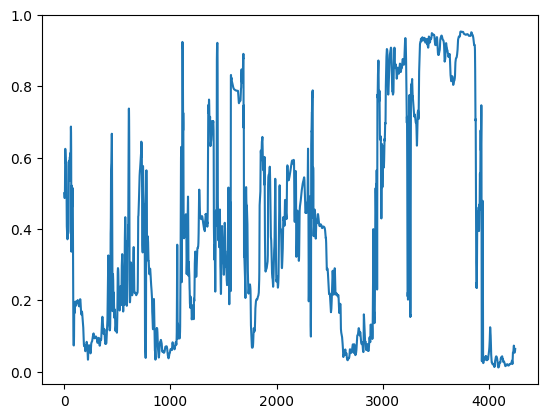

In [93]:
plt.plot(predictions2)

In [21]:
def createRealTimeTestData(dataset,start,end):
    result = pd.read_csv(dataset)
    result = result[start:end]
    result['EulerX'] = 0
    result['EulerY'] = 0
    result['EulerZ'] = 0
    print(len(result))
    result['Roll'],result['Pitch'],result['Yaw'] = result['Pitch'],result['Roll'],result['Yaw']
    result['EulerX'],result['EulerY'],result['EulerZ'] = result['Roll'],result['Pitch'],result['Yaw']        
    result = result.drop(columns=['Timestamp','Roll','Yaw','Pitch'])
    for col in range(9):
        result.iloc[:,col] = uniform_filter1d(result.iloc[:,col],size=10)

    result['Acc_X'],result['Acc_Z'] = result['Acc_Z'],result['Acc_X']
    result['Gyro_X'],result['Gyro_Z'] = result['Gyro_Z'],result['Gyro_X'] 
    result['EulerX'],result['EulerZ'] = result['EulerZ'],result['EulerX'] 
    result['Acc_X'] = result['Acc_X']/-9.8
    result['Acc_Y'] = result['Acc_Y']/-9.8
    result['Acc_Z'] = result['Acc_Z']/-9.8


    test = result
    
    print(test.head())
    return test

def runRealTimePredictions(test):
    predictions = []
    for i in range(250,len(test)-500):
        x = test[i:i+500].reset_index(drop=True)
        test_tensor = tf.convert_to_tensor(x)
        predictions.append(model2.predict(np.asarray([test_tensor])).item())
    return predictions

In [23]:
test = createRealTimeTestData('phoneThrow.csv',0,5000)

5000
      Acc_X     Acc_Y     Acc_Z    Gyro_X    Gyro_Y    Gyro_Z     EulerX  \
0 -0.678658 -0.715662  0.255702 -0.086282 -0.051158  0.070950 -82.979675   
1 -0.677669 -0.715948  0.255928 -0.086084 -0.054426  0.067117 -82.955212   
2 -0.673757 -0.716553  0.255977 -0.085122 -0.062642  0.055740 -82.897187   
3 -0.665424 -0.716821  0.254604 -0.082861 -0.070202  0.040774 -82.887897   
4 -0.657385 -0.716357  0.250447 -0.080449 -0.074478  0.028527 -82.990933   

      EulerY     EulerZ  
0  20.706239 -44.641601  
1  20.756321 -44.687820  
2  20.886531 -44.863867  
3  21.036311 -45.217727  
4  20.937774 -45.556826  


In [25]:
predictions = runRealTimePredictions(test)

ValueError: in user code:

    File "c:\Users\prach\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\prach\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\prach\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\prach\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\prach\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\prach\miniconda3\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 1000, 9), found shape=(None, 500, 9)


In [ ]:
plt.plot(predictions)

In [5]:
import tensorflow as tf
saved_model_dir = "model2"
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
converter.target_spec.supported_ops = [
tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS
]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert() 
open("model.tflite", "wb").write(tflite_model)


97856